## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\laogoon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

Epoch 48/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.9886 - acc: 0.6700 - val_loss: 1.4686 - val_acc: 0.4899
Epoch 49/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.9869 - acc: 0.6705 - val_loss: 1.4690 - val_acc: 0.4896

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 50/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.9832 - acc: 0.6727 - val_loss: 1.4672 - val_acc: 0.4919


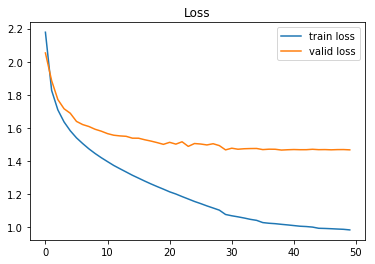

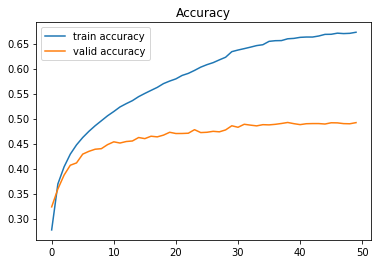

Running with optimizer: rmsprop
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7662 - acc: 0.3919 - val_loss: 4.0041 - val_acc: 0.2361
Epoch 2/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5102 - acc: 0.4661 - val_loss: 3.0342 - val_acc: 0.2620
Epoch 3/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4046 - acc: 0.5024 - val_loss: 1.9168 - val_acc: 0.3555
Epoch 4/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.3330 - acc: 0.5283 - val_loss: 1.9139 - val_acc: 0.3683
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2779 - acc: 0.5496 - val_loss: 2.0105 - val_acc: 0.3368
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.2204 - acc: 0.5688 - val_loss: 3.3493 - val_acc: 0.2157
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1807 - acc: 0.5

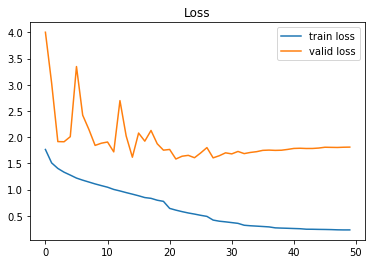

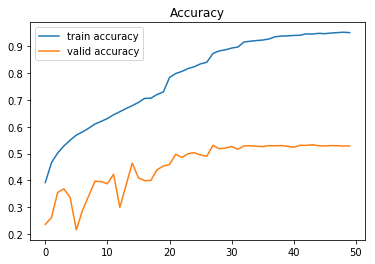

Running with optimizer: adam
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.4805 - acc: 0.8301 - val_loss: 2.2088 - val_acc: 0.4798
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.4121 - acc: 0.8574 - val_loss: 2.3106 - val_acc: 0.4477
Epoch 3/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.3909 - acc: 0.8676 - val_loss: 2.2447 - val_acc: 0.4459
Epoch 4/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.3668 - acc: 0.8752 - val_loss: 2.2757 - val_acc: 0.4734
Epoch 5/50
50000/50000 [==============================] - 2s 34us/step - loss: 0.3474 - acc: 0.8833 - val_loss: 2.3603 - val_acc: 0.4608
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.3287 - acc: 0.8888 - val_loss: 2.6324 - val_acc: 0.4421

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/50
50000/5

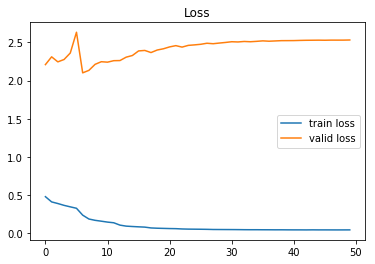

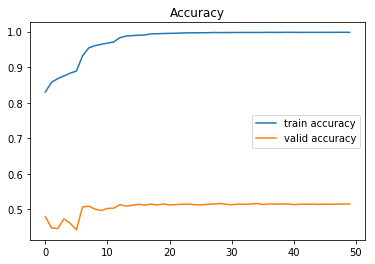

In [14]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
rmsprop = optimizers.RMSprop(lr=0.001, epsilon=None, decay=0.0) 
adam = optimizers. Adam(lr=0.001, epsilon=None, decay=0.0) 

OPTIMIZER = ['sgd', 'rmsprop', 'adam']

for opt in OPTIMIZER:
    print('Running with optimizer:', opt)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
              )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()